<a href="https://colab.research.google.com/github/guilhermelaviola/IntegrativePracticeInDataScience/blob/main/Class03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Techniques for Data Analysis**
Data organization is essential for analysis, involving logical structuring of information with tools like OpenRefine. This organization is vital for handling both structured and unstructured data types. Subsequent descriptive analysis summarizes data to reveal patterns through statistical techniques, using tools like Excel for visualization. Time series analysis focuses on temporal data patterns, considering seasonality and outliers. Data formatting and importing ensure compatibility, employing formats like CSV, SQL, and JSON, with an emphasis on data cleanliness and standardization. Descriptive analysis also encompasses distribution and correlation analyses, helping professionals make informed decisions and predictions through efficient tools like Excel and Python.

In [18]:
# Importing all the necessary libraries and resources:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Example: Data Importing & Formatting**
Data importing involves bringing data from external sources—such as CSV files, Excel spreadsheets, databases, or APIs—into a software environment for analysis. Formatting ensures the data is structured correctly, including proper column names, consistent data types (e.g., numeric, text, date), standardized units, and organized tables. Good formatting makes data easier to read, process, and analyze while preventing errors in later stages.

In [19]:
# Example data:
data = {
    'date': pd.date_range(start='2025-01-01', periods=10, freq='D'),
    'sales': [120, 130, 125, None, 150, 160, None, 170, 180, 190],
    'customers': [12, 15, 14, 16, None, 20, 22, 19, 21, 23]
}

df = pd.DataFrame(data)

# Converting date to datetime and set as index, which is useful for time series:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

print('Raw Data:')
print(df)

Raw Data:
            sales  customers
date                        
2025-01-01  120.0       12.0
2025-01-02  130.0       15.0
2025-01-03  125.0       14.0
2025-01-04    NaN       16.0
2025-01-05  150.0        NaN
2025-01-06  160.0       20.0
2025-01-07    NaN       22.0
2025-01-08  170.0       19.0
2025-01-09  180.0       21.0
2025-01-10  190.0       23.0


## **Example: Data Cleaning / Organization**
Data cleaning is the process of identifying and correcting errors or inconsistencies in a dataset. This may include handling missing values, removing duplicates, correcting typos, standardizing formats, and addressing outliers. Organization involves structuring the data logically—such as arranging columns clearly, grouping related variables, and creating tidy datasets. Clean and well-organized data improves accuracy, reliability, and efficiency in analysis.

In [20]:
# Handling missing values:
df_clean = df.fillna(method='ffill')

print('\nCleaned Data:')
print(df_clean)


Cleaned Data:
            sales  customers
date                        
2025-01-01  120.0       12.0
2025-01-02  130.0       15.0
2025-01-03  125.0       14.0
2025-01-04  125.0       16.0
2025-01-05  150.0       16.0
2025-01-06  160.0       20.0
2025-01-07  160.0       22.0
2025-01-08  170.0       19.0
2025-01-09  180.0       21.0
2025-01-10  190.0       23.0


/tmp/ipython-input-1677976594.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df.fillna(method='ffill')


## **Descriptive Analysis**
Descriptive analysis summarizes and describes the main features of a dataset. It uses statistical measures such as mean, median, mode, standard deviation, and range, along with visualizations like charts and graphs. The goal is to understand patterns, distributions, and general trends without making predictions or drawing causal conclusions. It provides a clear overview of what the data shows.

In [21]:
print('\nDescriptive Statistics:')
print(df_clean.describe())


Descriptive Statistics:
            sales  customers
count   10.000000  10.000000
mean   151.000000  17.800000
std     25.033311   3.705851
min    120.000000  12.000000
25%    126.250000  15.250000
50%    155.000000  17.500000
75%    167.500000  20.750000
max    190.000000  23.000000


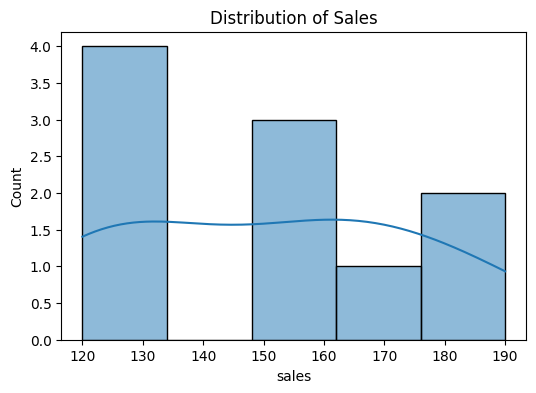

In [22]:
# Distribution plot (sales):
plt.figure(figsize=(6,4))
sns.histplot(df_clean['sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

## **Example: Correlation Analysis**
Correlation analysis measures the strength and direction of the relationship between two variables. It helps determine whether variables move together positively, negatively, or not at all. The correlation coefficient (commonly ranging from -1 to +1) indicates how strong the relationship is. However, correlation does not imply causation—it only shows association, not cause-and-effect relationships.

In [23]:
# Correlation Matrix:
corr = df_clean.corr()
print('\nCorrelation Matrix:')
print(corr)


Correlation Matrix:
              sales  customers
sales      1.000000   0.912654
customers  0.912654   1.000000


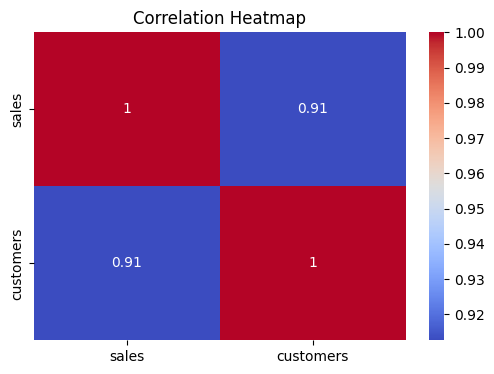

In [24]:
# Correlation Heatmap:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Example: Time Series Analysis**
Time series analysis examines data collected over time to identify trends, seasonal patterns, cycles, and fluctuations. It is commonly used in areas such as finance, economics, and sales forecasting. By analyzing historical patterns, time series methods help predict future values and understand how data evolves over time.

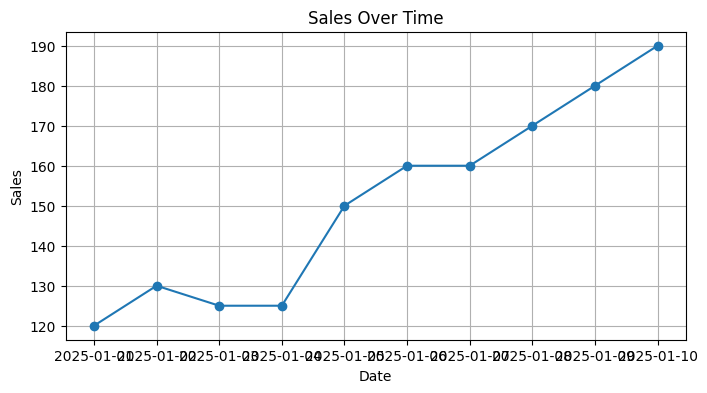

In [25]:
# Plotting Time Series:
plt.figure(figsize=(8,4))
plt.plot(df_clean.index, df_clean['sales'], marker='o')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

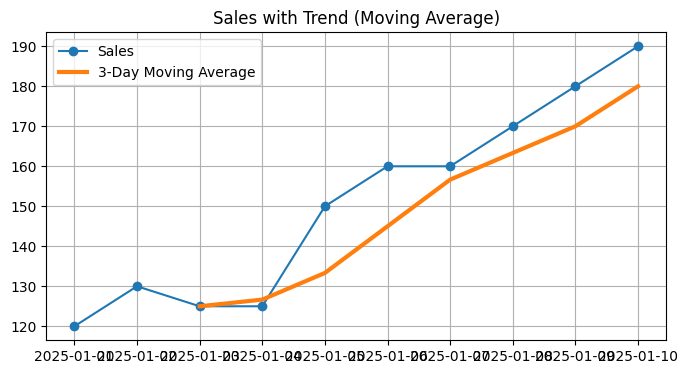

In [26]:
# Simple moving average (trend extraction):
df_clean['sales_MA'] = df_clean['sales'].rolling(window=3).mean()
plt.figure(figsize=(8,4))
plt.plot(df_clean.index, df_clean['sales'], label='Sales', marker='o')
plt.plot(df_clean.index, df_clean['sales_MA'], label='3-Day Moving Average', linewidth=3)
plt.title('Sales with Trend (Moving Average)')
plt.legend()
plt.grid(True)
plt.show()